In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17360, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 17360 (delta 36), reused 18 (delta 18), pack-reused 17308 (from 2)
Receiving objects: 100% (17360/17360), 16.23 MiB | 27.39 MiB/s, done.
Resolving deltas: 100% (11898/11898), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s 

In [ ]:
# Mini dataset for tests already done
!curl -L https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip -o coco128.zip
!unzip -q coco128.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  5781k      0  0:00:01  0:00:01 --:--:-- 13.4M


In [ ]:
%pwd

'/content/yolov5'

In [ ]:
%cd data/

/content/yolov5/data


In [ ]:
# check if this file already exists. if it does not exist run cell
!touch coco128_split.yaml
# fill file with:
''' train: ../coco128_split/images/train
val: ../coco128_split/images/val

nc: 80
names: [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
         'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat',
         'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
         'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
         'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
         'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
         'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
         'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
         'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush' ]
 '''

" train: ../coco128_split/images/train\nval: ../coco128_split/images/val\n\nnc: 80\nnames: [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',\n         'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat',\n         'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',\n         'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',\n         'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',\n         'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',\n         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',\n         'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',\n         'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',\n         'refrigerator', 'book', 'clock', 'vase', 'scissors'

In [ ]:
%cd ..

/content/yolov5


In [ ]:
import os
import random
import shutil
from pathlib import Path

random.seed(42)

# Original paths
img_dir = Path("coco128/images/train2017")
lbl_dir = Path("coco128/labels/train2017")

# New dirs
for split in ['train', 'val']:
    os.makedirs(f"coco128_split/images/{split}", exist_ok=True)
    os.makedirs(f"coco128_split/labels/{split}", exist_ok=True)

# List imgs
img_files = list(img_dir.glob("*.jpg"))
random.shuffle(img_files)

# Split 80/20
split_idx = int(0.8 * len(img_files))
train_imgs = img_files[:split_idx]
val_imgs = img_files[split_idx:]

# Copy imgs + label function
def copy_files(img_list, split):
    for img_path in img_list:
        label_path = lbl_dir / f"{img_path.stem}.txt"
        if label_path.exists():
            shutil.copy(img_path, f"coco128_split/images/{split}/{img_path.name}")
            shutil.copy(label_path, f"coco128_split/labels/{split}/{label_path.name}")

copy_files(train_imgs, 'train')
copy_files(val_imgs, 'val')

In [ ]:
!python train.py --img 640 --batch 8 --epochs 30 --data data/coco128_split.yaml --weights yolov5s.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-07 08:53:10.286600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744015990.307961    3752 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744015990.314254    3752 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: 20034352 (20034352-universit-del-piemonte-orientale) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
train: weig

In [ ]:
# Load img from your device
from google.colab import files
uploaded = files.upload()

image_path = list(uploaded.keys())[0]
print("You loaded:", image_path)


Saving img_od.jpg to img_od.jpg
Hai caricato: img_od.jpg


In [ ]:
%pwd

'/content/yolov5'

In [ ]:
!find runs/train/ -name best.pt

runs/train/exp2/weights/best.pt


In [ ]:
# I do detection. the image is resized at 640x640
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --source img_od.jpg

detect: weights=['runs/train/exp2/weights/best.pt'], source=img_od.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-411-gf4d8a84c Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/img_od.jpg: 448x640 3 persons, 3 wine glasss, 1 cup, 1 dining table, 1 cell phone, 28.3ms
Speed: 0.5ms pre-process, 28.3ms inference, 136.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


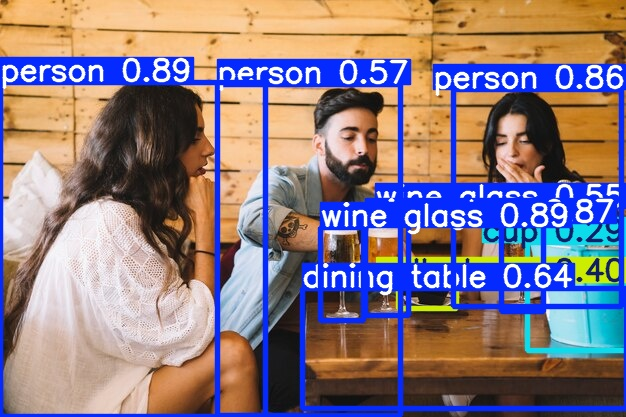

In [ ]:
from IPython.display import Image, display

display(Image(filename='runs/detect/exp2/img_od.jpg'))
